# Import Necessary Libreries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Import Dataset

In [2]:
book_data=pd.read_csv("./book.csv")
book_data             

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Data Understanding

In [3]:
book_data.shape

(2000, 11)

In [4]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
book_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [7]:
book_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation matrix and heatmap

In [8]:
corr=book_data.corr()
corr

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


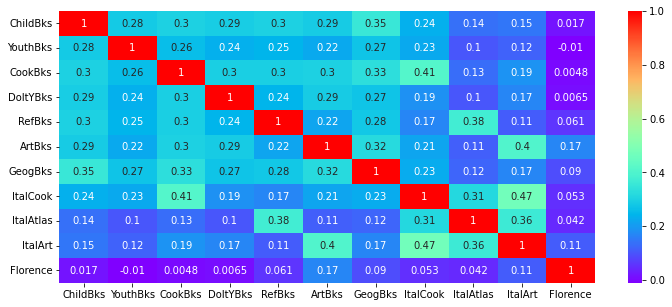

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(data=corr,annot=True,cmap="rainbow")
plt.show()

## Model Building

## 1.  Min_Support=0.02  Metric=Confidence    Min_threshold=0.6

###  Max_length=3

In [10]:
frequent_iteams_set=apriori(df=book_data,min_support=0.02,use_colnames=True,max_len=3)
frequent_iteams_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
146,0.0360,"(ItalCook, ArtBks, GeogBks)"
147,0.0295,"(ItalArt, ArtBks, GeogBks)"
148,0.0300,"(ArtBks, GeogBks, Florence)"
149,0.0375,"(ItalArt, ArtBks, ItalCook)"


In [11]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
149,"(ItalArt, ItalCook)",(ArtBks),0.0375,0.2410,0.0375,1.000000,4.149378,0.028463,inf
150,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
151,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
152,"(ItalArt, ItalCook)",(GeogBks),0.0375,0.2760,0.0240,0.640000,2.318841,0.013650,2.011111


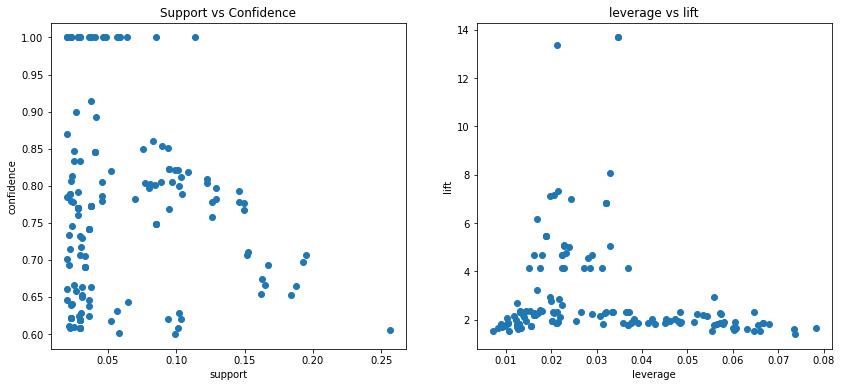

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

###  Max_length=5

In [13]:
frequent_iteams_set=apriori(df=book_data,min_support=0.02,use_colnames=True,max_len=5)
frequent_iteams_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
266,0.0200,"(GeogBks, CookBks, ItalCook, ArtBks, YouthBks)"
267,0.0275,"(GeogBks, RefBks, DoItYBks, CookBks, ArtBks)"
268,0.0215,"(GeogBks, DoItYBks, CookBks, ItalCook, ArtBks)"
269,0.0250,"(ItalArt, DoItYBks, CookBks, ItalCook, ArtBks)"


In [14]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
566,"(ItalCook, ArtBks, GeogBks)","(ItalArt, CookBks)",0.0360,0.0410,0.0240,0.666667,16.260163,0.022524,2.877000
567,"(ItalArt, ItalCook, CookBks)","(ArtBks, GeogBks)",0.0375,0.1275,0.0240,0.640000,5.019608,0.019219,2.423611
568,"(ItalArt, ArtBks, ItalCook)","(GeogBks, CookBks)",0.0375,0.1925,0.0240,0.640000,3.324675,0.016781,2.243056
569,"(ItalArt, GeogBks)","(ArtBks, ItalCook, CookBks)",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591


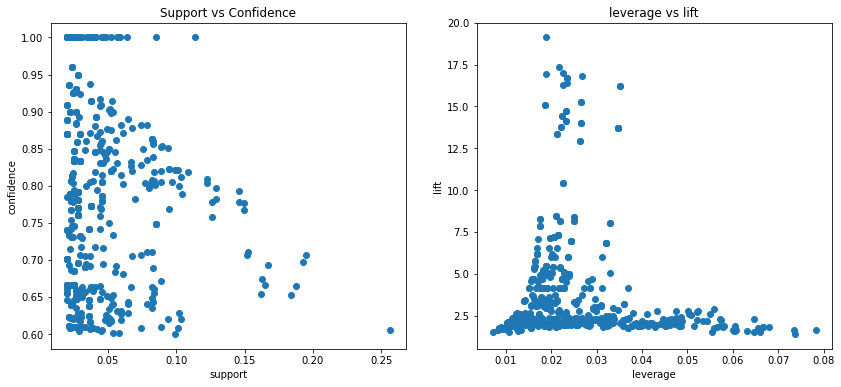

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

###  Max_length=7

In [16]:
frequent_iteams_set=apriori(df=book_data,min_support=0.02,use_colnames=True,max_len=7)
frequent_iteams_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(RefBks, DoItYBks, ChildBks, CookBks, ArtBks, ..."
272,0.0270,"(GeogBks, RefBks, DoItYBks, ChildBks, CookBks,..."
273,0.0310,"(GeogBks, DoItYBks, ChildBks, CookBks, ArtBks,..."
274,0.0225,"(GeogBks, RefBks, ChildBks, CookBks, ArtBks, Y..."


In [17]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
591,"(RefBks, ArtBks, GeogBks, YouthBks)","(ChildBks, CookBks)",0.0305,0.256,0.0225,0.737705,2.881660,0.014692,2.836500
592,"(GeogBks, RefBks, DoItYBks, ChildBks, ArtBks)",(CookBks),0.0275,0.431,0.0240,0.872727,2.024889,0.012148,4.470714
593,"(GeogBks, RefBks, DoItYBks, CookBks, ArtBks)",(ChildBks),0.0275,0.423,0.0240,0.872727,2.063185,0.012368,4.533571
594,"(RefBks, DoItYBks, ChildBks, CookBks, ArtBks)",(GeogBks),0.0370,0.276,0.0240,0.648649,2.350176,0.013788,2.060615


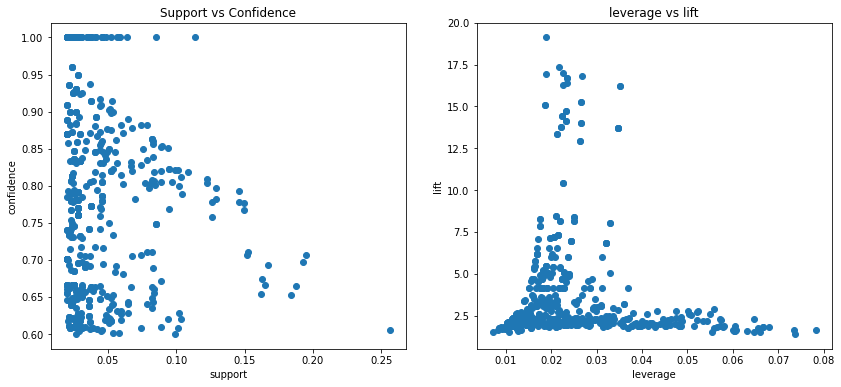

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

###  Max_length=All

In [19]:
frequent_iteams_set=apriori(df=book_data,min_support=0.02,use_colnames=True,max_len=None)
frequent_iteams_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(RefBks, DoItYBks, ChildBks, CookBks, ArtBks, ..."
272,0.0270,"(GeogBks, RefBks, DoItYBks, ChildBks, CookBks,..."
273,0.0310,"(GeogBks, DoItYBks, ChildBks, CookBks, ArtBks,..."
274,0.0225,"(GeogBks, RefBks, ChildBks, CookBks, ArtBks, Y..."


In [20]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.6,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
591,"(RefBks, ArtBks, GeogBks, YouthBks)","(ChildBks, CookBks)",0.0305,0.256,0.0225,0.737705,2.881660,0.014692,2.836500
592,"(GeogBks, RefBks, DoItYBks, ChildBks, ArtBks)",(CookBks),0.0275,0.431,0.0240,0.872727,2.024889,0.012148,4.470714
593,"(GeogBks, RefBks, DoItYBks, CookBks, ArtBks)",(ChildBks),0.0275,0.423,0.0240,0.872727,2.063185,0.012368,4.533571
594,"(RefBks, DoItYBks, ChildBks, CookBks, ArtBks)",(GeogBks),0.0370,0.276,0.0240,0.648649,2.350176,0.013788,2.060615


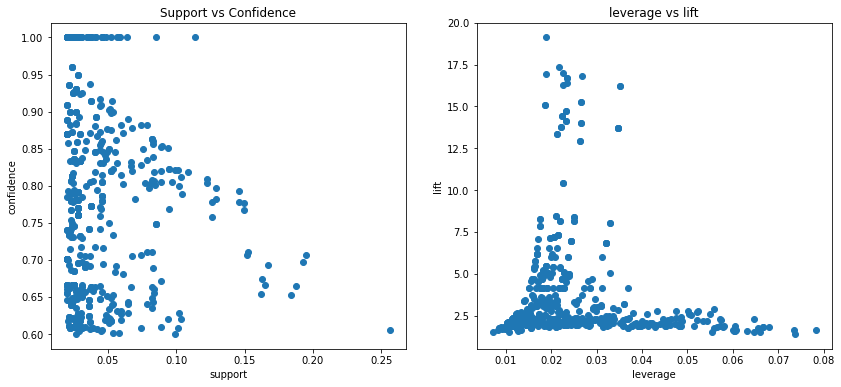

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### 1. If we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  2. With this Min Support And Confidence level at best we can get  7 iteams frequent  iteam set
### because if we increase the max length result will be same

## 2.  Min_Support=0.05  Metric=Confidence    Min_threshold=0.5

###  Max_length=3

In [22]:
frequent_iteams_set=apriori(df=book_data,min_support=0.05,use_colnames=True,max_len=3)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
119,"(ArtBks, DoItYBks)",(GeogBks),0.1235,0.276,0.0730,0.591093,2.141642,0.038914,1.770574
120,"(ArtBks, GeogBks)",(DoItYBks),0.1275,0.282,0.0730,0.572549,2.030316,0.037045,1.679725
121,"(DoItYBks, GeogBks)",(ArtBks),0.1325,0.241,0.0730,0.550943,2.286072,0.041067,1.690210
122,"(RefBks, ArtBks)",(GeogBks),0.0895,0.276,0.0565,0.631285,2.287264,0.031798,1.963576


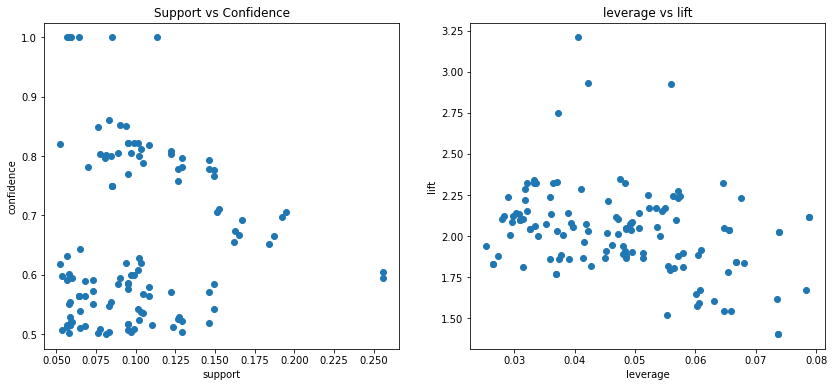

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Max_length=5

In [24]:
frequent_iteams_set=apriori(df=book_data,min_support=0.05,use_colnames=True,max_len=5)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231
256,"(ChildBks, ArtBks, GeogBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
257,"(ArtBks, GeogBks, CookBks)","(DoItYBks, ChildBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120
258,"(ArtBks, DoItYBks, ChildBks)","(GeogBks, CookBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494


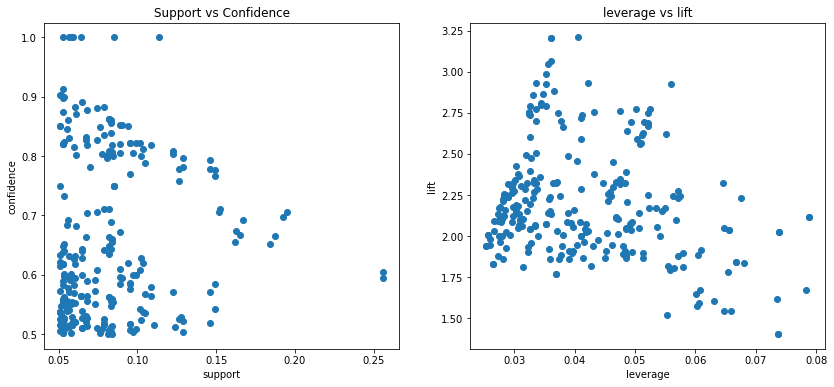

In [25]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

###  Max_length=7

In [26]:
frequent_iteams_set=apriori(df=book_data,min_support=0.05,use_colnames=True,max_len=7)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231
256,"(ChildBks, ArtBks, GeogBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
257,"(ArtBks, GeogBks, CookBks)","(DoItYBks, ChildBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120
258,"(ArtBks, DoItYBks, ChildBks)","(GeogBks, CookBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494


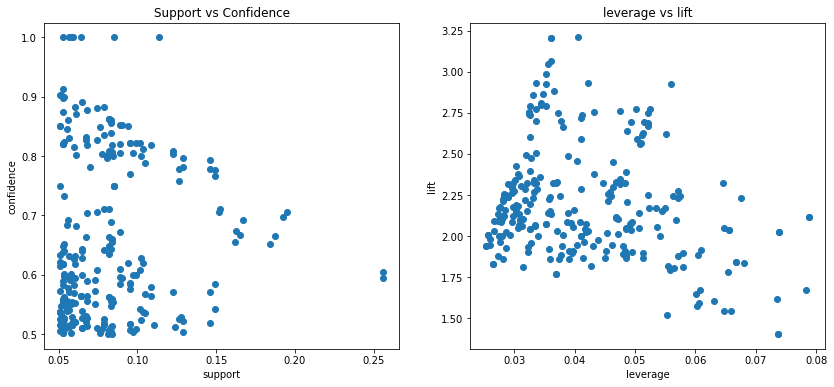

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

###  Max_length=All

In [28]:
frequent_iteams_set=apriori(df=book_data,min_support=0.05,use_colnames=True,max_len=None)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231
256,"(ChildBks, ArtBks, GeogBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
257,"(ArtBks, GeogBks, CookBks)","(DoItYBks, ChildBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120
258,"(ArtBks, DoItYBks, ChildBks)","(GeogBks, CookBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494


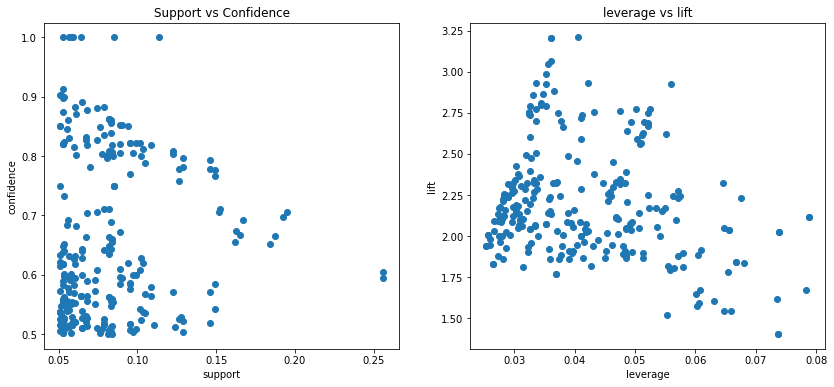

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  6 iteams frequent set
### because if we increase the max length result will be same

## 3.  Min_Support=0.1  Metric=Confidence    Min_threshold=0.5

### Max_length=3

In [30]:
frequent_iteams_set=apriori(df=book_data,min_support=0.1,use_colnames=True,max_len=3)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


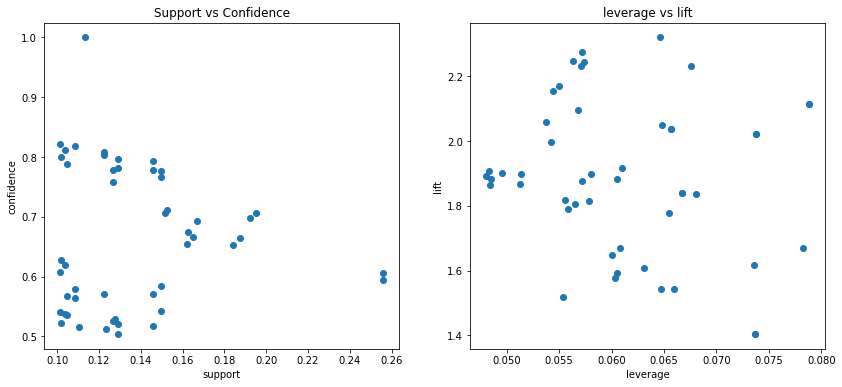

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Max_length=5

In [32]:
frequent_iteams_set=apriori(df=book_data,min_support=0.1,use_colnames=True,max_len=5)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


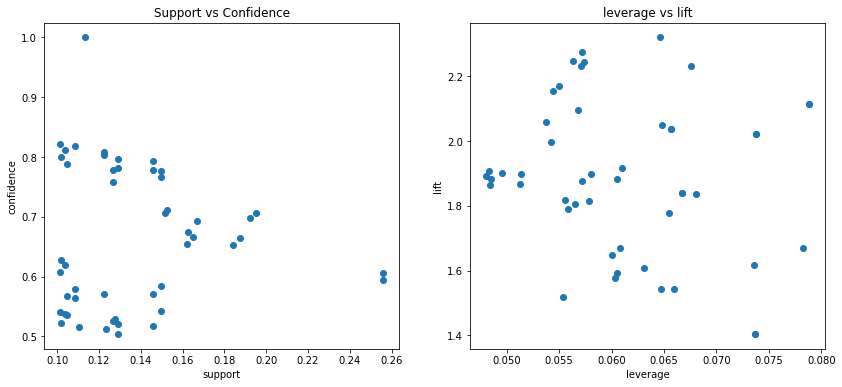

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Max_length=2

In [34]:
frequent_iteams_set=apriori(df=book_data,min_support=0.1,use_colnames=True,max_len=2)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


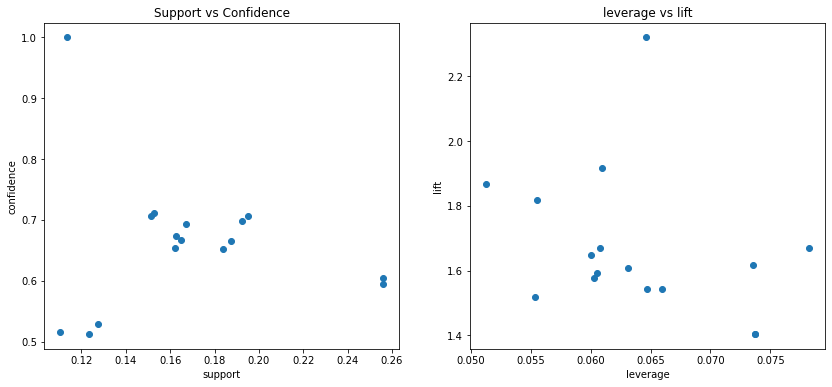

In [35]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Max_legth=All

In [36]:
frequent_iteams_set=apriori(df=book_data,min_support=0.1,use_colnames=True,max_len=None)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


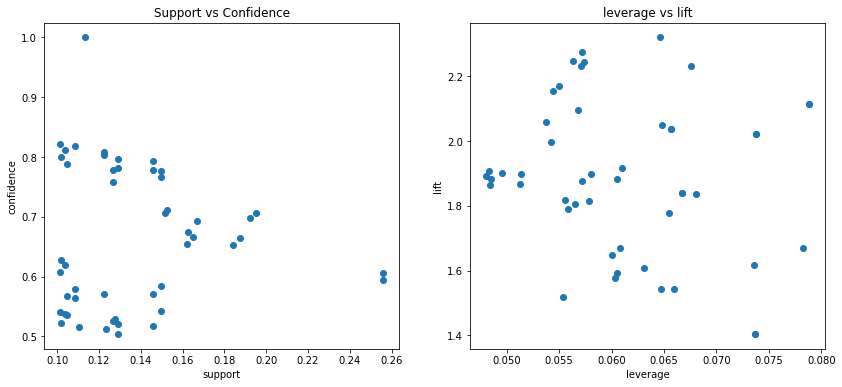

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  3 iteams frequent set
### because if we increase the max length result will be same

## 4.  Min_Support=0.08 Metric=Confidence    Min_threshold=0.5

### max_len=2

In [38]:
frequent_iteams_set=apriori(df=book_data,min_support=0.08,use_colnames=True,max_len=2)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
8,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
9,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968


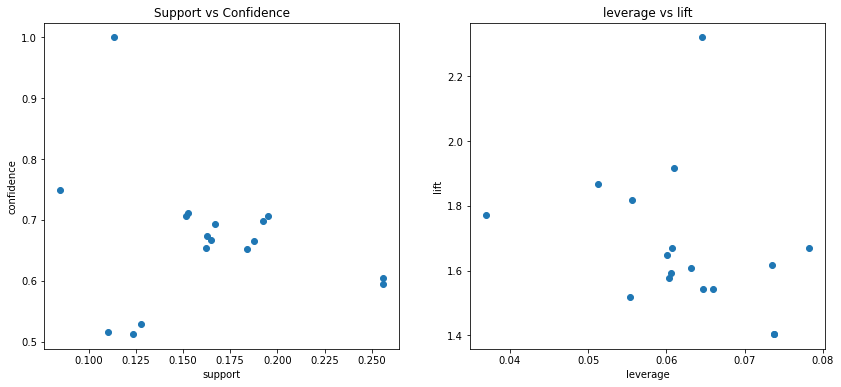

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=3

In [40]:
frequent_iteams_set=apriori(df=book_data,min_support=0.08,use_colnames=True,max_len=3)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
77,"(RefBks, GeogBks)",(CookBks),0.1105,0.431,0.0890,0.805430,1.868747,0.041374,2.924395
78,"(RefBks, CookBks)",(GeogBks),0.1525,0.276,0.0890,0.583607,2.114517,0.046910,1.738740
79,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
80,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063


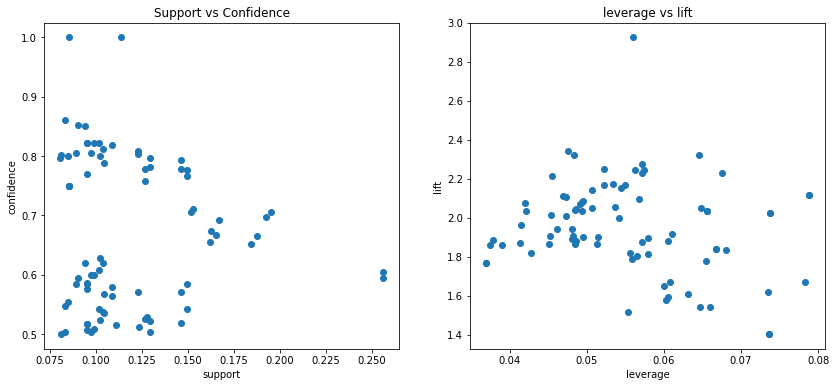

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=4

In [42]:
frequent_iteams_set=apriori(df=book_data,min_support=0.08,use_colnames=True,max_len=4)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
108,"(ChildBks, GeogBks, CookBks)",(ArtBks),0.1495,0.2410,0.0835,0.558528,2.317545,0.047471,1.719250
109,"(ArtBks, ChildBks, CookBks)",(GeogBks),0.1265,0.2760,0.0835,0.660079,2.391591,0.048586,2.129907
110,"(ArtBks, GeogBks)","(ChildBks, CookBks)",0.1275,0.2560,0.0835,0.654902,2.558211,0.050860,2.155909
111,"(ArtBks, ChildBks)","(GeogBks, CookBks)",0.1625,0.1925,0.0835,0.513846,2.669331,0.052219,1.660997


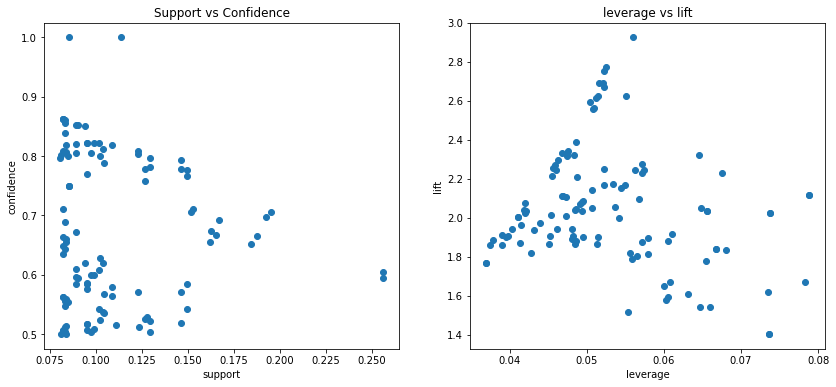

In [43]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### max_len=6

In [44]:
frequent_iteams_set=apriori(df=book_data,min_support=0.08,use_colnames=True,max_len=6)
frequent_iteams_set

rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
108,"(ChildBks, GeogBks, CookBks)",(ArtBks),0.1495,0.2410,0.0835,0.558528,2.317545,0.047471,1.719250
109,"(ArtBks, ChildBks, CookBks)",(GeogBks),0.1265,0.2760,0.0835,0.660079,2.391591,0.048586,2.129907
110,"(ArtBks, GeogBks)","(ChildBks, CookBks)",0.1275,0.2560,0.0835,0.654902,2.558211,0.050860,2.155909
111,"(ArtBks, ChildBks)","(GeogBks, CookBks)",0.1625,0.1925,0.0835,0.513846,2.669331,0.052219,1.660997


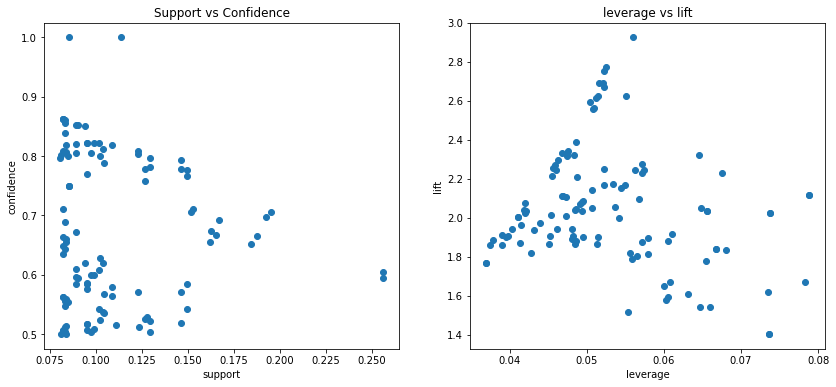

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rules['support'], rules['confidence'],cmap="plasma")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.subplot(1,2,2)
plt.scatter(rules['leverage'], rules['lift'],cmap="plasma")
plt.xlabel('leverage')
plt.ylabel('lift')
plt.title('leverage vs lift')
plt.show()

### Observation:
### if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  with this Min Support And Confidence level at best we can get  4 iteams frequent set

## 5.  Min_Support=0.2 Metric=Confidence    Min_threshold=0.5

In [51]:
frequent_iteams_set=apriori(df=book_data,min_support=0.2,use_colnames=True,max_len=None)
frequent_iteams_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [54]:
rules=association_rules(df=frequent_iteams_set,metric='confidence',min_threshold=0.20,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


### Observation:
### 1. if we increase Min support and Confidence lavel there will be less number of frequent iteams sets


###  2. With this Min Support And Confidence level at best we can get  only one 1 iteam frequent set

